<a href="https://colab.research.google.com/github/Mrezakhodashenas/PhD-NN/blob/Neuron_population/Neuronal_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:
!pip install neuron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 34.1 MB/s eta 0:00:00


In [3]:
!pip install neuron-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 17.4 MB/s eta 0:00:00


In [4]:
!pip install efel
# to identify electrophysiological features (AP height, half width, ...)
# from the recorded time series)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.4/638.4 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 31.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [5]:
# !pip install control

In [6]:
# !pip install pde

In [7]:
# !pip show pde

In [8]:
!pip install netpyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.3/419.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.8 MB/s eta 0:00:00


In [9]:
!pip install snn

  Preparing metadata (setup.py) ... done
  Created wheel for snn: filename=snn-0.4-py3-none-any.whl size=2187 sha256=ce6605ae9e1a16e9b961936b18f0f26f9d5645eae6dcf096bc80e9c42d06673d
  Stored in directory: /root/.cache/pip/wheels/c5/24/e3/a603344f027bf7d1f4d8d6fb7fe698172ebd3972a50e982a28
Successfully built snn


In [10]:
from neuron import h, gui
import os
import json
from neuron.units import mV, ms, um
from neuron import h, rxd
from netpyne import specs, sim
from neuron.units import mV, ms, µm, um, nM, uM, mM, s, µM
from matplotlib import cm
import plotly
import plotly.graph_objects as go
from plotly import express as px
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import scipy.signal as signal
from numpy.fft import fft, fftfreq, rfft, ifft
# import control
from scipy.integrate import odeint
# import pde
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
# from control.matlab import *
import math
from matplotlib.widgets import Cursor
from matplotlib.pyplot import semilogx
from matplotlib import pyplot
import pylab
# from engineering_notation import EngNumber
# import PySpice.Logging.Logging as Logging
# logger = Logging.setup_logging()
# from PySpice.Doc.ExampleTools import find_libraries
# from PySpice.Probe.Plot import plot
# from PySpice.Spice.Library import SpiceLibrary
# from PySpice.Spice.Netlist import Circuit
# from PySpice.Unit import *
%matplotlib inline
plt.close('all')
import time
start = time.time()

h.load_file("stdrun.hoc")


1.0

In [15]:
# # !pwd
# # # cd /content          # to make sure to be in the /content


# if os.path.isdir('/content/Neuron_Cells_Mods'):
#   !rm -r /content/Neuron_Cells_Mods                     # it removes the directory and its contents.


# have a copy of the files in your machine instead of downloading one by one
# !git clone https://github.com/ericaygriffith/cells_netpyne2021.git
!git clone https://github.com/Mrezakhodashenas/Neuron_Cells_Mods.git


# cd /content/Neuron_Cells_Mods/

Cloning into 'Neuron_Cells_Mods'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 172 (delta 4), reused 64 (delta 2), pack-reused 100
Receiving objects: 100% (172/172), 11.17 MiB | 18.47 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [16]:
# !nrnivmodl

netParams.cellParams.keys():  odict_keys(['PYR'])

Start time:  2024-05-17 10:39:27.638905

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.02 s.
Making connections...
  Number of connections on node 0: 193 
  Done; cell connection time = 0.06 s.
Adding stims...
  Number of stims on node 0: 15 
  Done; cell stims creation time = 0.00 s.
Recording 8 traces of 1 types on node 0

Running simulation using NEURON for 2000.0 ms...
  Done; run time = 3.88 s; real-time ratio: 0.52.

Gathering data...
  Done; gather time = 0.02 s.

Analyzing...
  Cells: 40
  Connections: 193 (4.83 per cell)
  Spikes: 33 (0.41 Hz)
  Simulated time: 2.0 s; 1 workers
  Run time: 3.88 s
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell


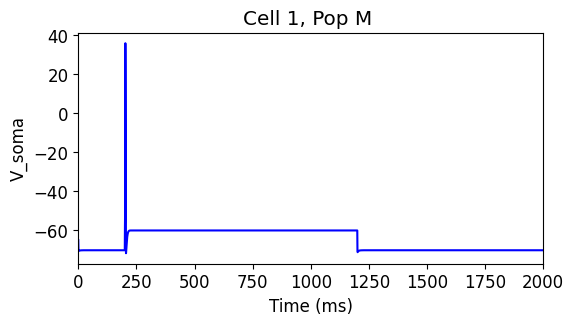

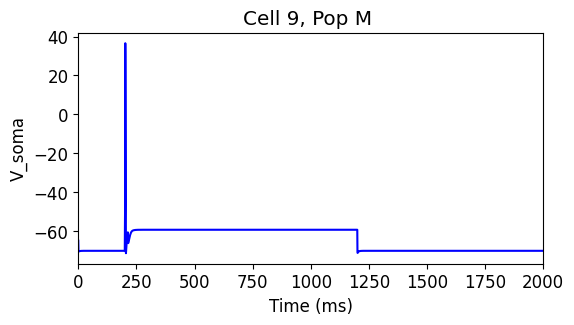

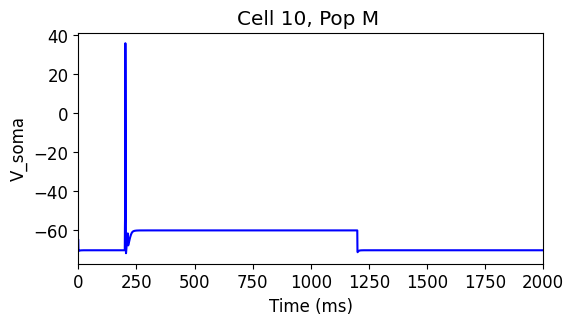

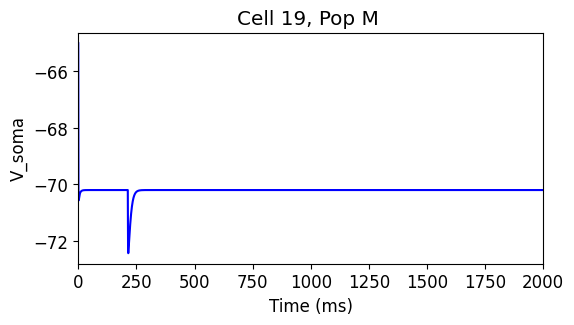

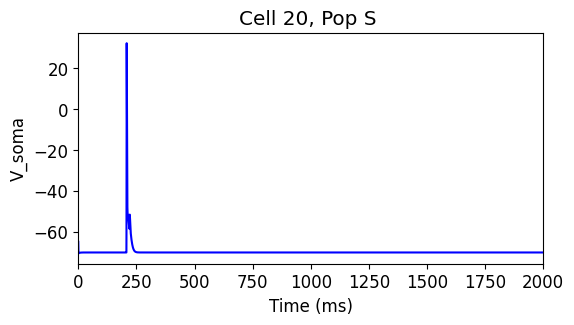

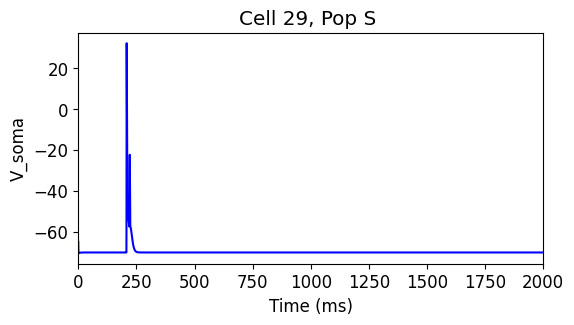

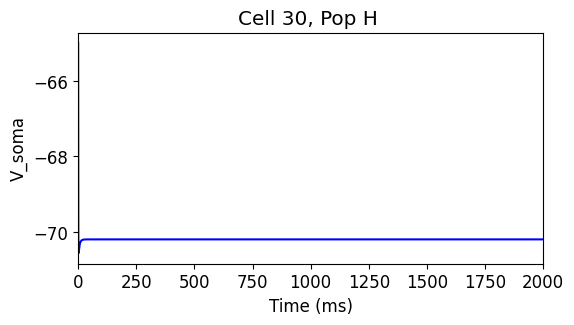

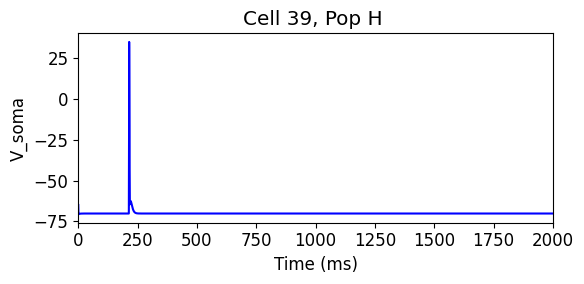

Plotting 2D representation of network cell locations and connections...


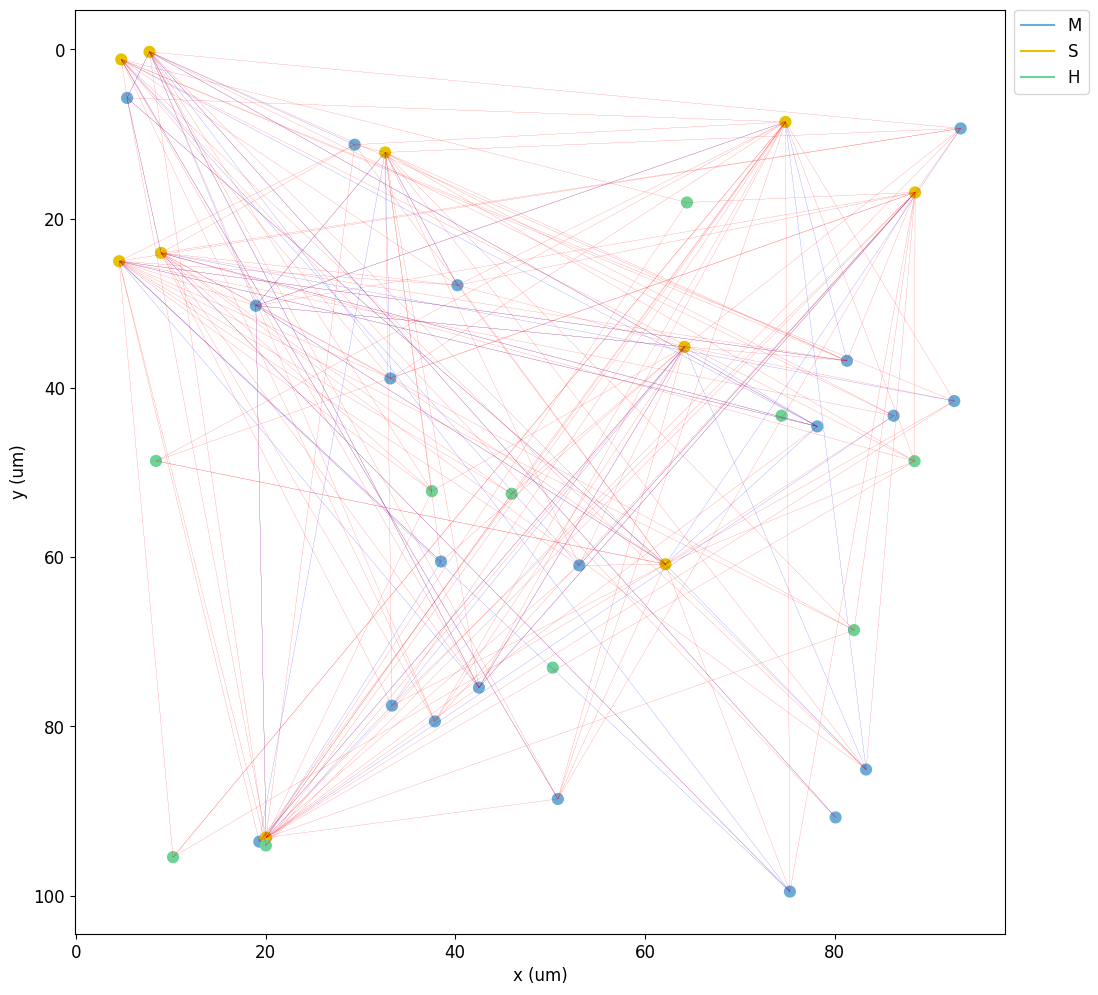

  Done; plotting time = 2.79 s

Total time = 6.79 s
Preparing spike data...
Plotting raster...


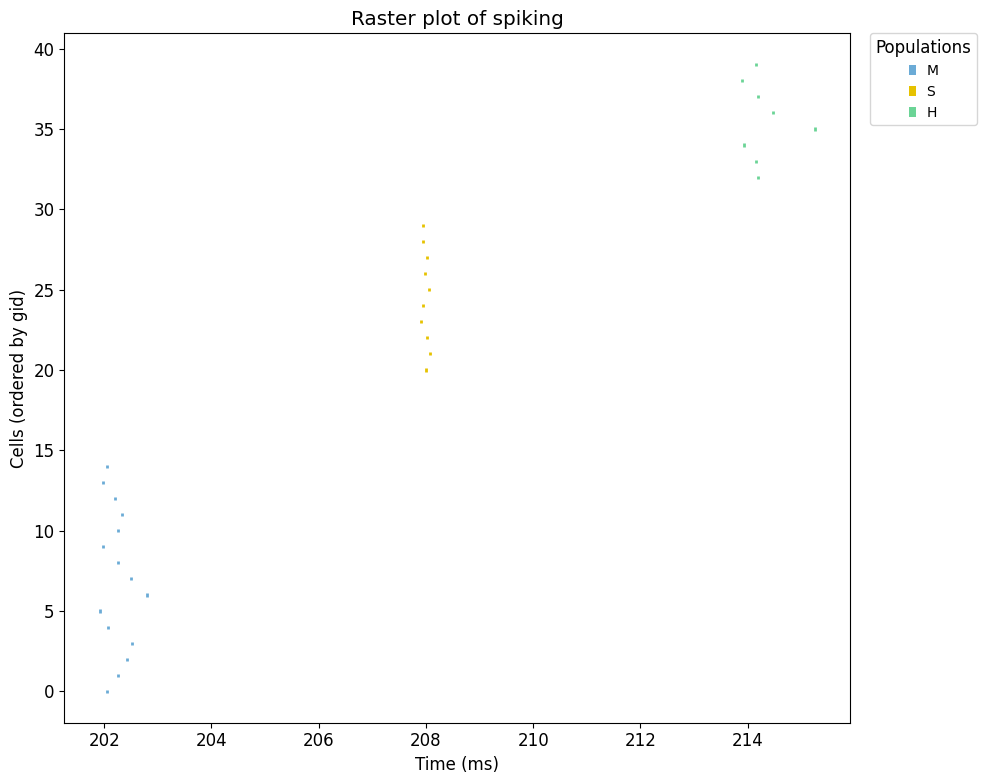

In [63]:
# set up netParams object
netParams = specs.NetParams()

# ---------------------------------# import cell
# # import cell from .json format
# netParams.loadCellParamsRule(
#     label='TC_reduced',
#     # conds={'cellModel': 'HH_reduced', 'cellType': 'TC'},
#     fileName='TC_reduced_cellParams.json'
#     )

# # import a detailed morphology from a .swc file
# netParams.importCellParams(
#     label='PYR_HH3D_swc',
#     conds={'cellType': 'PYR', 'cellModel': 'HH3D_swc'},
#     fileName='BS0284.swc',
#     cellName='swc_cell'
# )

netParams.cellParams['PYR'] = {
        'secs': {'soma':
                {'geom': {'diam': 18.8, 'L': 18.8, 'Ra': 123.0},
                'mechs': {'hh': {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}}}}}

print('netParams.cellParams.keys(): ', netParams.cellParams.keys())

# -----------------------------------------------------------------------------#  Population parameters --------------------------------------------------------------------------------------------
netParams.popParams['M'] = {'cellType': 'PYR', 'numCells': 20}
netParams.popParams['S'] = {'cellType': 'PYR', 'numCells': 10}
netParams.popParams['H'] = {'cellType': 'PYR', 'numCells': 10}

# -----------------------------------------------------------------------------# Synaptic mechanism parameters --------------------------------------------------------------------------
# netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0}  # excitatory synaptic mechanism
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0}         #NMDA
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}       #GABA

# -----------------------------------------------------------------------------# Stimulation --------------------------------------------------------------------------------------------
netParams.stimSourceParams['Input_1'] = {'type': 'IClamp', 'del': 200, 'dur': 1000, 'amp': 'uniform(0.4,0.5)'}
# netParams.stimSourceParams['Input_2'] = {'type': 'VClamp', 'dur': [0,50,200], 'amp': [-60,-30,40], 'gain': 1e5, 'rstim': 1, 'tau1': 0.1, 'tau2': 0}
# netParams.stimSourceParams['Input_3'] = {'type': 'AlphaSynapse', 'onset': 'uniform(300,600)', 'tau': 1, 'gmax': 'post_ynorm', 'e': 0} # synaptic input will start randomly at any time between 300 and 600 milliseconds after the simulation begins.////
      #  'tau': synaptic conductance decay (A smaller value of tau implies a faster decay of the synaptic conductance.)////
      # gmax: Specifies the maximum conductance of the synapse.  'post_ynorm' indicates that the maximum conductance will be determined by the normalization of the postsynaptic cell's total membrane surface area.

# netParams.stimSourceParams['Input_4'] = {'type': 'NetStim', 'interval': 'uniform(20,100)', 'number': 2, 'start': 100, 'noise': 0.0}
# netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 10, 'noise': 0.5}
# netParams.stimSourceParams['Input_inh'] = {'type': 'IClamp','del': 100,'dur': 1000,'amp': -0.25}   # Amplitude of the pulse (in nano Amp)
# netParams.stimSourceParams['Input'] = {'type': 'IClamp','del': 100,'dur': 1000,'amp': 2.5}   # Amplitude of the pulse (in nano Amp)

# -----------------------------------------------------Target of the stimulation

# netParams.stimTargetParams['Input_3->M']= {'source' : 'Input_3', 'sec': 'soma','loc' : 0.5,'conds' : {'pop': 'M'}}
netParams.stimTargetParams['Input_1->M'] = {'source': 'Input_1', 'sec':'soma', 'loc': 0.8, 'conds': {'pop':'M', 'cellList': range(15)}}
# netParams.stimTargetParams['Input_2->S'] = {'source': 'Input_2', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':'S', 'ynorm': [0,0.5]}}
# netParams.stimTargetParams['Input_3->M'] = {'source': 'Input_3', 'sec':'soma', 'loc': 0.2, 'conds': {'pop':'M', 'cellList': [2,4,5,8,10,15,19]}}
# netParams.stimTargetParams['Input_4->PYR'] = {'source': 'Input_4', 'sec':'soma', 'loc': 0.5, 'weight': '0.1+normal(0.2,0.05)','delay': 1, 'conds': {'cellType':'PYR', 'ynorm': [0.6,1.0]}}
# netParams.stimTargetParams['bkg->PYR'] = {'source': 'bkg', 'conds': {'cellType': 'PYR'}, 'weight': 0.01, 'delay': 5, 'synMech': 'exc'}

# -----------------------------------------------------------------------------# Connectivity --------------------------------------------------------------------------------------------
netParams.connParams['M->S'] = { #  S -> M label
        'preConds': {'pop': 'M'},   # conditions of presyn cells
        'postConds': {'pop': 'S'},  # conditions of postsyn cells
        'probability': 0.5,         # probability of connection
        # 'divergence': 12,               # probability of connection
        'weight': 0.01,             # synaptic weight
        'delay': 5,                 # transmission delay (ms)
        'synMech': 'exc'}           # synaptic mechanism

netParams.connParams['S->M'] = { #  S -> M label
        'preConds': {'pop': 'S'},   # conditions of presyn cells
        'postConds': {'pop': 'M'},  # conditions of postsyn cells
        'probability': 0.2,         # probability of connection
        'weight': 0.01,             # synaptic weight
        'delay': 5,                 # transmission delay (ms)
        'synMech': 'inh'}           # synaptic mechanism

netParams.connParams['S->H'] = { #  S -> M label
        'preConds': {'pop': 'S'},   # conditions of presyn cells
        'postConds': {'pop': 'H'},  # conditions of postsyn cells
        'probability': 0.2,         # probability of connection
        'weight': 0.01,             # synaptic weight
        'delay': 5,                 # transmission delay (ms)
        'synMech': 'exc'}

netParams.connParams['H->M'] = { #  S -> M label
        'preConds': {'pop': 'H'},   # conditions of presyn cells
        'postConds': {'pop': 'S'},  # conditions of postsyn cells
        'probability': 0.2,         # probability of connection
        'weight': 0.01,             # synaptic weight
        'delay': 5,                 # transmission delay (ms)
        'synMech': 'exc'}
# -----------------------------------------------------------------------------# Simulation options --------------------------------------------------------------------------------------------
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 2*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'tut2'  # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.saveJson = False



simConfig.analysis['plotRaster'] = {'saveFig': False}                  # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [1,9, 10, 19, 20, 29, 30, 39], 'saveFig': False, 'figSize': (6, 3)} # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = {'saveFig': False}                   # plot 2D cell positions and connections

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)
sim.analysis.plotRaster()

# import pylab; pylab.show()  # this line is only necessary in certain systems where figures appear empty


# # -----------------------------------------------------------------------------# plotting Morphologies --------------------------------------------------------------------------------------------
# ps = h.PlotShape(False)
# # ps.scale(-80, 50)
# # ps.variable('v')
# ps.plot(plotly).show()
# sim.analysis.plotShape(includePre = [], includePost=['TC_pop1'],showSyns=True, dist=0.6, saveFig=True)
# sim.analysis.plotShape(cvar='voltage', includePre=[0], saveFig=True)
# import pylab; pylab.show()  # this line is only necessary in certain systems where figures appear empty
# plt.show()

Preparing spike data...
Plotting raster...


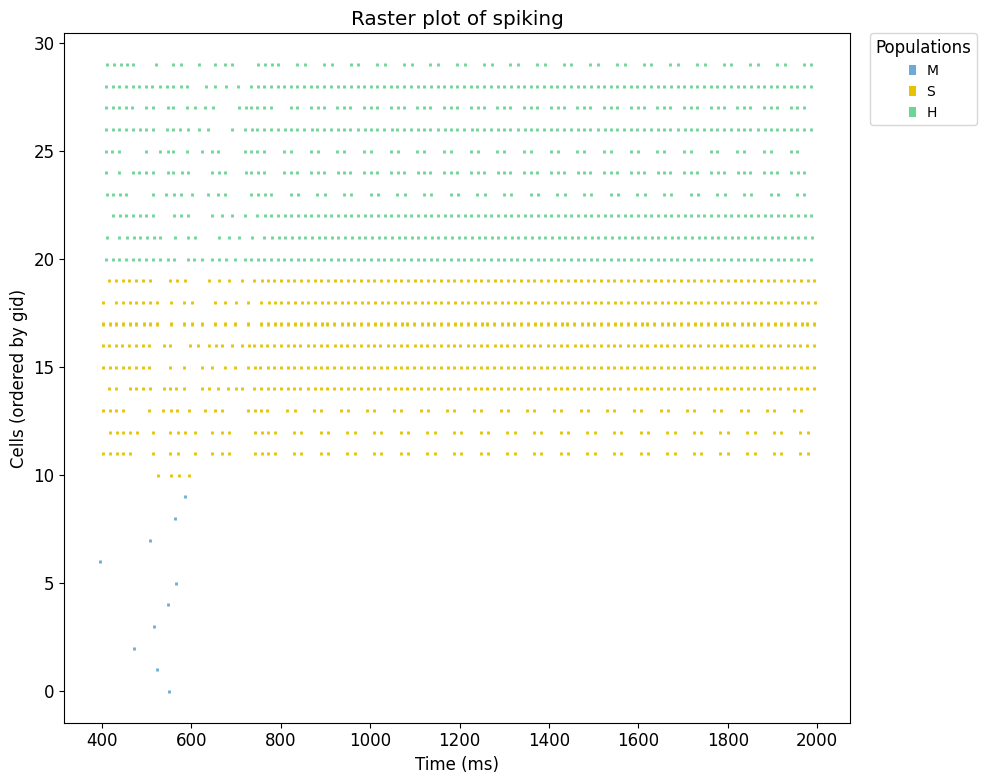

In [42]:
sim.analysis.plotRaster()


In [ ]:
netParams.cellParams.keys()

odict_keys(['PYR'])

## import a detailed morphology from a .swc file

---




In [ ]:
# netParams.importCellParams(
#     label='mouse_hipp_swc',
#     conds={'cellType': 'hipp', 'cellModel': 'HH3D'},
#     fileName='mouseGABA_hipp.swc',
#     cellName='swc_hippcell'
# )

In [ ]:
# netParams.importCellParams(
#     label='CA1a_hipp_swc',
#     conds={'cellType': 'PYR_CA1', 'cellModel': 'HH3D'},
#     fileName='CA1a-Ascoli-2006.swc',
#     cellName='CA1a_Ascoli_swc'
# )

# netParams.importCellParams(
#     label='EC5_hipp_swc',
#     conds={'cellType': 'PYR_EC', 'cellModel': 'HH3D'},
#     fileName='EC layer5-Buzsaki-2010.swc',
#     cellName='EC5_swc'
# )

# netParams.importCellParams(
#     label='OLM_CA1_hipp_swc',
#     conds={'cellType': 'intrn_OLM_CA1', 'cellModel': 'HH3D'},
#     fileName='OLM to Neuroglia and distal Dendrite-Parvalbumin (PV)-positive -stratum oriens-CA1-Somogyi-2014.swc',
#     cellName='OLM_CA1_hipp_swc'
# )



## import a detailed morphology from a .hoc file


In [ ]:
# # import cell from .hoc format
# netParams.importCellParams(
#     label='PYR_HH3D_hoc',
#     conds={'cellType': 'PYR', 'cellModel': 'HH3D_hoc'},
#     fileName='geom.hoc',
#     cellName='E21',
#     importSynMechs=False
# )

In [ ]:
# # import cell from .py format
# netParams.importCellParams(
#     label='sRE_py',
#     conds={'cellType': 'sRE', 'cellModel': 'HH'},
#     fileName='sRE.py',
#     cellName='sRE',
#     importSynMechs=False
# )

### Finding the Geom (length & Diam) of the soma

### Finding the channel mechanism of the soma

In [ ]:
# # changing the passive leak channel conductance
# # netParams.cellParams['TC_reduced']['secs']['soma']['mechs']['pas']['g'] = 1.9e-5


# # # changing the gNabar conductance
# # netParams.cellParams['EC5_hipp_swc']['secs']['soma']['mechs']['hh2ad']['gnabar'] = 0.12
# # netParams.cellParams['CA1a_hipp_swc']['secs']['soma']['mechs']['hh2ad']['gnabar'] = 0.12
# # netParams.cellParams['OLM_CA1_hipp_swc']['secs']['soma']['mechs']['hh2ad']['gnabar'] = 0.14

# netParams.cellParams['TC_reduced']['secs']['soma']['mechs']['hh2ad']['gnabar'] = 0.02


# # netParams.cellParams['EC5_hipp_swc']['secs']['soma']['geom'] = {'L': 96.0,
# #  'Ra': 100.0,
# #  'cm': 1.0,
# #  'diam': 96.0,
# #  'nseg': 1,
# #  'pt3d': [[0, 0, 0, 96.0], [0, 96.0, 0, 96.0]]}
# # netParams.cellParams['EC5_hipp_swc']['secs']['soma']['geom'].keys()


### inserting passive leak channel into the soma of the 'EC5_hipp_swc'

In [ ]:
# netParams.cellParams['EC5_hipp_swc']['secs']['soma_0']['mechs']['pas'] = {'e': -70, 'g': 0.0000357}
# netParams.cellParams['EC5_hipp_swc']['secs']['soma_0']['mechs']['pas']

# # netParams.cellParams['EC5_hipp_swc']['secs']['soma']['mechs']['pas']['g'] = 1.9e-5
# # netParams.cellParams['CA1a_hipp_swc']['secs']['soma']['mechs']['pas']['g'] = 1.9e-5
# # netParams.cellParams['OLM_CA1_hipp_swc']['secs']['soma']['mechs']['pas']['g'] = 1.9e-5
# # netParams.cellParams['OLM_CA1_hipp_swc']['secs']['soma']['mechs']['pas']['g']

{_repr_mimebundle_: {}, _repr_html_: {}, _repr_markdown_: {}, _repr_svg_: {}, _repr_png_: {}, _repr_pdf_: {}, _repr_jpeg_: {}, _repr_latex_: {}, _repr_json_: {}, _repr_javascript_: {}, _repr_intrinsic_type_: {}, hh2ad: {gnabar: 0.12, _repr_mimebundle_: {}, _repr_html_: {}, _repr_markdown_: {}, _repr_svg_: {}, _repr_png_: {}, _repr_pdf_: {}, _repr_jpeg_: {}, _repr_latex_: {}, _repr_json_: {}, _repr_javascript_: {}, _repr_intrinsic_type_: {}}, pas: {_repr_mimebundle_: {}, _repr_html_: {}, _repr_markdown_: {}, _repr_svg_: {}, _repr_png_: {}, _repr_pdf_: {}, _repr_jpeg_: {}, _repr_latex_: {}, _repr_json_: {}, _repr_javascript_: {}, _repr_intrinsic_type_: {}}}

### Change the Capacitance of all the compartments in the CA1a_hipp_swc

## Create a population of cells (has to match the earlier imported file)

In [ ]:
# netParams.popParams['EC5_pop'] = {'cellType': 'EC_hipp', 'cellModel': 'HH3D', 'numCells': 5 }
# netParams.popParams['CA1_pop'] = {'cellType': 'CA1_hipp', 'cellModel': 'HH3D', 'numCells': 5 }
# netParams.popParams['OLM_CA1_pop'] = {'cellType': 'OLM_CA1_hipp', 'cellModel': 'HH3D', 'numCells': 5 }


# netParams.popParams['TC_pop1'] = {'cellType': 'TC_reduced', 'numCells': 15}
# netParams.popParams['TC_pop2'] = {'cellType': 'TC', 'numCells': 5, 'cellModel': 'HH_reduced'}
# netParams.popParams['TC_pop3'] = {'cellType': 'TC', 'numCells': 4, 'cellModel': 'HH_reduced'}



### Synaptic Mechanism Parameters


### Add Hyperpolarising current clamp stim of -0.1 nA to the population


### Connectivity

### Add Config Params:

In [ ]:
# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 2*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'Test'         # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file

simConfig.analysis['plotRaster'] = {'saveFig': True}                  # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [1], 'saveFig': True}  # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = {'saveFig': True}                   # plot 2D cell positions and connections

### Plotting the morphology

In [ ]:
from matplotlib import pyplot as plt
# %matplotlib inline



# sim.analysis.plotShape(includePre = [], includePost=['TC_pop1'],showSyns=True, dist=0.6, saveFig=True)
sim.analysis.plotShape(cvar='voltage', includePre=[0], saveFig=True)
plt.show()




Plotting 3D cell shape ...



Start time:  2024-05-17 07:50:06.712687

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 20 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 67 
  Done; cell connection time = 0.02 s.
Adding stims...
  Number of stims on node 0: 10 
  Done; cell stims creation time = 0.00 s.
Recording 1 traces of 1 types on node 0

Running simulation using NEURON for 2000.0 ms...
  Done; run time = 0.94 s; real-time ratio: 2.13.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 20
  Connections: 67 (3.35 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 2.0 s; 1 workers
  Run time: 0.94 s
Preparing spike data...
No spikes available to plot raster
Plotting raster...

There was an exception in plotRaster()
Plotting recorded cell traces ... cell


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/netpyne/analysis/utils.py", line 87, in wrapper
    return function(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/netpyne/plotting/plotRaster.py", line 277, in plotRaster
    popNumCells = [max(spkInds)]
UnboundLocalError: local variable 'spkInds' referenced before assignment


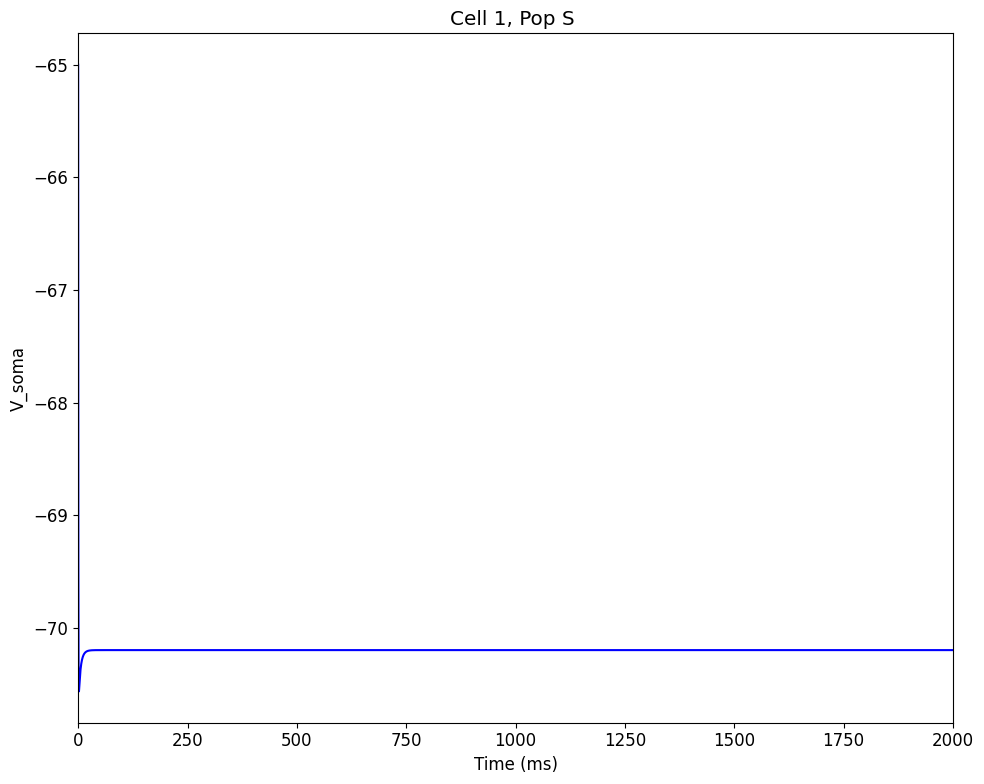

Plotting 2D representation of network cell locations and connections...


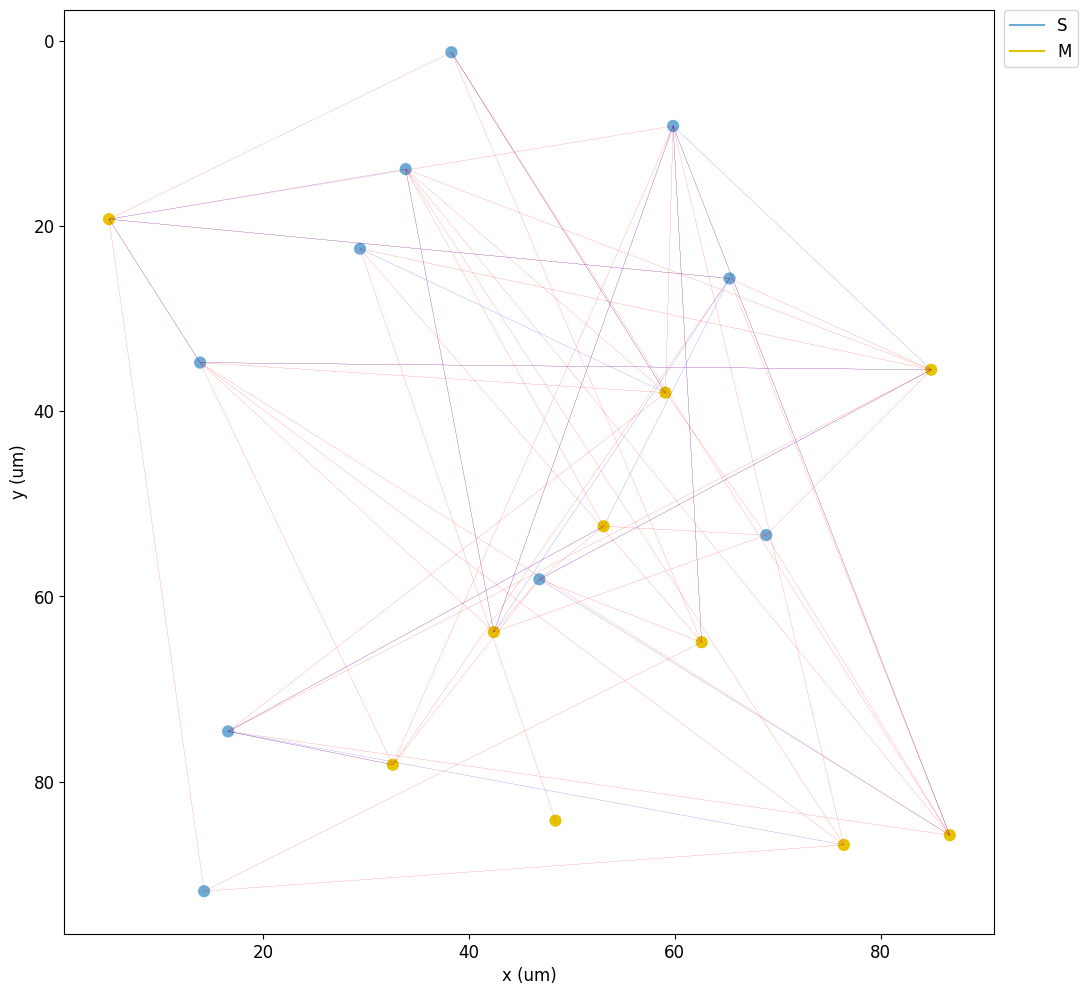

  Done; plotting time = 1.01 s

Total time = 1.99 s


In [ ]:
sim.createSimulateAnalyze(netParams, simConfig)
